In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
dataset = pd.read_excel("/content/C_Trolls.xlsx")
dataset.head(20)

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
5,Ill save you the trouble sister. Here comes a ...,1
6,Im dead serious.Real athletes never cheat don...,1
7,...go absolutely insane.hate to be the bearer ...,1
8,Lmao im watching the same thing ahaha. The ga...,1
9,LOL no he said What do you call a jail cell ...,1


In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     19963 non-null  object
 1   annotation  20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [4]:
print(dataset.dropna(inplace=True))


None


In [5]:
pd.unique(dataset['annotation'])


array([1, 0])

In [6]:
print(dataset['annotation'])

0        1
1        1
2        1
3        1
4        1
        ..
19996    0
19997    0
19998    0
19999    0
20000    0
Name: annotation, Length: 19963, dtype: int64


In [7]:
if 'annotation' in dataset.columns and pd.api.types.is_numeric_dtype(dataset['annotation']):
    pos_neg = []
    for index, row in dataset.iterrows():

        if pd.notnull(row['annotation']):
            if row['annotation']:
                pos_neg.append(1)
            else:
                pos_neg.append(0)
        else:
            pos_neg.append(np.nan)
    dataset['Class_label'] = pos_neg
else:
    dataset['Class_label'] = np.nan

print(dataset)

                                                 content  annotation  \
0                                 Get fucking real dude.           1   
1       She is as dirty as they come  and that crook ...           1   
2       why did you fuck it up. I could do it all day...           1   
3       Dude they dont finish enclosing the fucking s...           1   
4       WTF are you talking about Men? No men thats n...           1   
...                                                  ...         ...   
19996    I dont. But what is complaining about it goi...           0   
19997   Bahah  yeah i&;m totally just gonna&; get pis...           0   
19998       hahahahaha >:) im evil mwahahahahahahahahaha           0   
19999            What&;s something unique about Ohio? :)           0   
20000              Who is the biggest gossiper you know?           0   

       Class_label  
0                1  
1                1  
2                1  
3                1  
4                1  
...      

In [8]:
dataset['Class_label'].value_counts()

,count
Class_label,
0,12159
1,7804


In [9]:
stp_words = set(stopwords.words('english'))
def clean_review(annotation):
  cleanreview=" ".join(word for word in annotation.split() if word not in stp_words)
  return cleanreview
  dataset['annotation'] = dataset['annotation'].apply(clean_review)

  print(dataset['annotation'])

In [10]:
dataset.head(20)

,content,annotation,Class_label
0,Get fucking real dude.,1,1
1,She is as dirty as they come and that crook ...,1,1
2,why did you fuck it up. I could do it all day...,1,1
3,Dude they dont finish enclosing the fucking s...,1,1
4,WTF are you talking about Men? No men thats n...,1,1
5,Ill save you the trouble sister. Here comes a ...,1,1
6,Im dead serious.Real athletes never cheat don...,1,1
7,...go absolutely insane.hate to be the bearer ...,1,1
8,Lmao im watching the same thing ahaha. The ga...,1,1
9,LOL no he said What do you call a jail cell ...,1,1


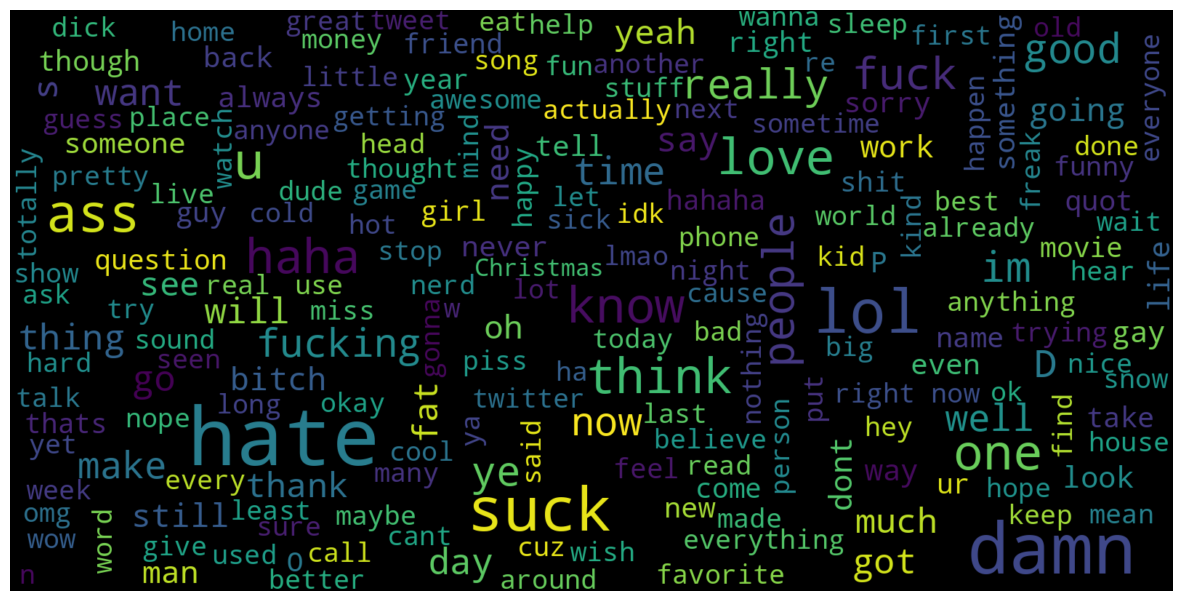

In [11]:
consolidated=' '.join(word for word in dataset['content'][dataset['Class_label']==0].astype(str))
wordcloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
cv = TfidfVectorizer(max_features=100)
x = cv.fit_transform(dataset['content']).toarray()
print(x.shape)
print(type(dataset['content']))

(19963, 100)
<class 'pandas.core.series.Series'>


In [13]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(x,dataset['content'],
                                                test_size=0.20 ,
                                                random_state=42)

In [14]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(dataset['content'])
y = dataset['annotation']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [16]:
dataset = RandomForestClassifier()
dataset.fit(x_train,y_train)

prediction = dataset.predict(x_test)
print(accuracy_score(y_test,prediction))
#print(x_test)
print(prediction)

0.9504132231404959
[1 0 0 ... 0 1 0]


In [21]:
def predict_cyberbullying(text):

    text_vector = vectorizer.transform([text]).toarray()
    prediction = dataset.predict(text_vector)
    return "Cyberbullying detected" if prediction[0] == 1 else "No cyberbullying detected"

# Example
print(predict_cyberbullying("I slept horribly. Kepted waking up every hour. Kept tossing and turning. Argh I hate having to work today! Time for cardio!"))


Cyberbullying detected
